<h2>Кореляційний аналіз даних про вплив різних факторів на продовжуваність життя</h2>

<p>
Хоча в минулому було проведено багато досліджень факторів, що впливають на очікувану тривалість життя, враховуючи демографічні змінні, структуру доходу та рівень смертності. Встановлено, що вплив імунізації та індекс людського розвитку раніше не враховувався. Крім того, деякі з минулих досліджень проводилися з урахуванням множинної лінійної регресії на основі набору даних за один рік для всіх країн. Отже, це дає мотивацію для вирішення обох факторів, зазначених раніше, шляхом формулювання регресійної моделі на основі моделі змішаних ефектів і множинної лінійної регресії, враховуючи дані за період з 2000 по 2015 рік для всіх країн. Також буде розглянуто важливу імунізацію, наприклад проти гепатиту В, поліомієліту та дифтерії. У двох словах, це дослідження буде зосереджено на факторах імунізації, факторах смертності, економічних факторах, соціальних факторах та інших факторах, пов’язаних зі здоров’ям. Оскільки спостереження в цьому наборі даних базуються на різних країнах, країні буде легше визначити фактор прогнозування, який сприяє нижчому значенню очікуваної тривалості життя. Це допоможе підказати країні, якій території слід надати значення, щоб ефективно покращити очікувану тривалість життя її населення.
</p>
<p>
Проект покладається на точність даних. Сховище даних Глобальної обсерваторії охорони здоров’я (GHO) під керівництвом Всесвітньої організації охорони здоров’я (ВООЗ) відстежує стан здоров’я, а також багато інших пов’язаних факторів для всіх країн. Набори даних стають доступними для громадськості з метою аналізу даних про здоров’я. Набір даних, пов’язаний із очікуваною тривалістю життя та факторами здоров’я для 193 країн, було зібрано з того самого веб-сайту сховища даних ВООЗ, а відповідні економічні дані – з веб-сайту Організації Об’єднаних Націй. Серед усіх категорій факторів, пов'язаних зі здоров'ям, були обрані лише ті критичні фактори, які є більш репрезентативними. Було помічено, що за останні 15 років у секторі охорони здоров’я відбувся величезний розвиток, що призвело до покращення рівня смертності людей, особливо в країнах, що розвиваються, порівняно з останніми 30 роками. Тому в цьому проекті ми розглянули дані за 2000-2015 роки для 193 країн для подальшого аналізу. Окремі файли даних були об’єднані в єдиний набір даних. При первинному візуальному огляді даних було виявлено деякі відсутні значення. Оскільки набори даних надходили від ВООЗ, ми не виявили очевидних помилок. Результат показав, що більшість відсутніх даних стосуються населення, гепатиту В і ВВП. Відсутні дані були з менш відомих країн, таких як Вануату, Тонга, Того, Кабо-Верде тощо. Знайти всі дані для цих країн було важко, тому було вирішено виключити ці країни з остаточного набору даних моделі. Остаточний об’єднаний файл (остаточний набір даних) складається з 22 стовпців і 2938 рядків, що означало 20 прогнозних змінних. Потім усі прогнозні змінні були розділені на кілька широких категорій: фактори, пов’язані з імунізацією, фактори смертності, економічні фактори та соціальні фактори.
</p>

In [50]:
from enum import Enum
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

class Description(Enum):
   COUNTRY = 'Country'
   YEAR = 'Year'
   STATUS = 'Status'
   LIFE_EXPECTANCY = 'Life expectancy '

class Factors(Enum):
   ADULT_MORTALITY = 'Adult Mortality'
   HEPATITIS_B = 'Hepatitis B'
   MEASLES = 'Measles '
   POLIO = 'Polio'
   DIPHTHERIA = 'Diphtheria '
   HIV_AIDS = ' HIV/AIDS'
   GDP = 'GDP'
   INFANT_DEATHS = 'infant deaths'
   ALCOHOL = 'Alcohol'
   PERCENTAGE_EXPENDITURE = 'percentage expenditure'
   BMI = ' BMI '
   UNDER_FIVE_DEATHS = 'under-five deaths '
   TOTAL_EXPENDITURE = 'Total expenditure'
   THINNESS_1_19_YEARS = ' thinness  1-19 years'
   INCOME_COMPOSITION_OF_RESOURCES = 'Income composition of resources'
   SCHOOLING = 'Schooling'

df = pd.read_csv("Life Expectancy Data.csv")

factors = [member.value for member in Factors]

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [51]:
def remove_empty():
   group_header = Description.COUNTRY.value
   country_means = df.groupby(group_header)[factors].mean()

   with_nan = country_means.index[country_means.isna().any(axis=1)]
   filtered = df[~df[group_header].isin(with_nan)]

   for country, group in filtered.groupby(group_header):
      factor_means = country_means.loc[country]
      group[factors] = group[factors].replace(0, factor_means)

   return filtered

df = remove_empty()

df[Description.COUNTRY.value].value_counts(normalize=True)
df[Description.STATUS.value].value_counts(normalize=True)

scaler = StandardScaler()
df[factors] = scaler.fit_transform(df[factors])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2352 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2352 non-null   object 
 1   Year                             2352 non-null   int64  
 2   Status                           2352 non-null   object 
 3   Life expectancy                  2352 non-null   float64
 4   Adult Mortality                  2352 non-null   float64
 5   infant deaths                    2352 non-null   float64
 6   Alcohol                          2208 non-null   float64
 7   percentage expenditure           2352 non-null   float64
 8   Hepatitis B                      2015 non-null   float64
 9   Measles                          2352 non-null   float64
 10   BMI                             2352 non-null   float64
 11  under-five deaths                2352 non-null   float64
 12  Polio                    

In [52]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            144
percentage expenditure               0
Hepatitis B                        337
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                8
Total expenditure                  148
Diphtheria                           8
 HIV/AIDS                            0
GDP                                 22
Population                         228
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64

In [53]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2352.000000,2352.000000,2.352000e+03,2.352000e+03,2.208000e+03,2.352000e+03,2.015000e+03,2.352000e+03,2.352000e+03,2.352000e+03,2.344000e+03,2.204000e+03,2.344000e+03,2352.000000,2.330000e+03,2.124000e+03,2.352000e+03,2352.000000,2.352000e+03,2.352000e+03
mean,2007.500000,68.882058,-7.854639e-17,-6.042030e-18,1.930823e-16,1.510508e-17,-2.380230e-17,1.510508e-17,-2.114711e-16,6.042030e-18,1.970362e-16,1.273432e-16,9.093977e-18,0.000000,2.744586e-17,1.342200e+07,1.752189e-16,5.098214,-4.229421e-17,2.718914e-16
std,4.610753,9.468580,1.000213e+00,1.000213e+00,1.000227e+00,1.000213e+00,1.000248e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000227e+00,1.000213e+00,1.000213,1.000215e+00,6.321469e+07,1.000213e+00,4.612024,1.000213e+00,1.000213e+00
min,2000.000000,36.300000,-1.295794e+00,-2.507160e-01,-1.092800e+00,-4.049350e-01,-3.168987e+00,-2.127917e-01,-1.823293e+00,-2.557827e-01,-3.349264e+00,-2.317389e+00,-3.372634e+00,-0.336779,-5.131848e-01,3.400000e+01,-1.094445e+00,0.100000,-2.968287e+00,-3.672611e+00
25%,2003.750000,62.975000,-7.212614e-01,-2.507160e-01,-9.257167e-01,-3.919814e-01,-1.552486e-01,-2.127917e-01,-9.509701e-01,-2.501219e-01,-2.109788e-01,-6.677535e-01,-1.672129e-01,-0.336779,-4.780588e-01,1.984078e+05,-7.406303e-01,1.700000,-6.360050e-01,-5.865818e-01
50%,2007.500000,71.850000,-1.782097e-01,-2.276304e-01,-2.004253e-01,-3.452686e-01,4.474990e-01,-2.112063e-01,2.422076e-01,-2.331395e-01,4.251601e-01,-5.183226e-02,4.232594e-01,-0.336779,-3.834419e-01,1.430108e+06,-3.425887e-01,3.600000,2.595531e-01,1.232050e-01
75%,2011.250000,75.300000,4.848642e-01,-9.681179e-02,7.280236e-01,-1.138950e-01,6.082317e-01,-1.815459e-01,9.039700e-01,-1.142628e-01,6.372064e-01,6.383871e-01,6.341424e-01,-0.193269,-8.192273e-02,7.821252e+06,4.811361e-01,7.300000,7.205021e-01,6.786903e-01
max,2015.000000,89.000000,4.386572e+00,1.360067e+01,3.428563e+00,1.067560e+01,7.287812e-01,1.847594e+01,1.996881e+00,1.389620e+01,7.220249e-01,3.721223e+00,7.184956e-01,8.722301,8.923445e+00,1.293859e+09,5.008858e+00,28.600000,1.519081e+00,2.715470e+00


<Axes: title={'center': 'Distribution of Life Expectancy'}, xlabel='Life expectancy ', ylabel='Count'>

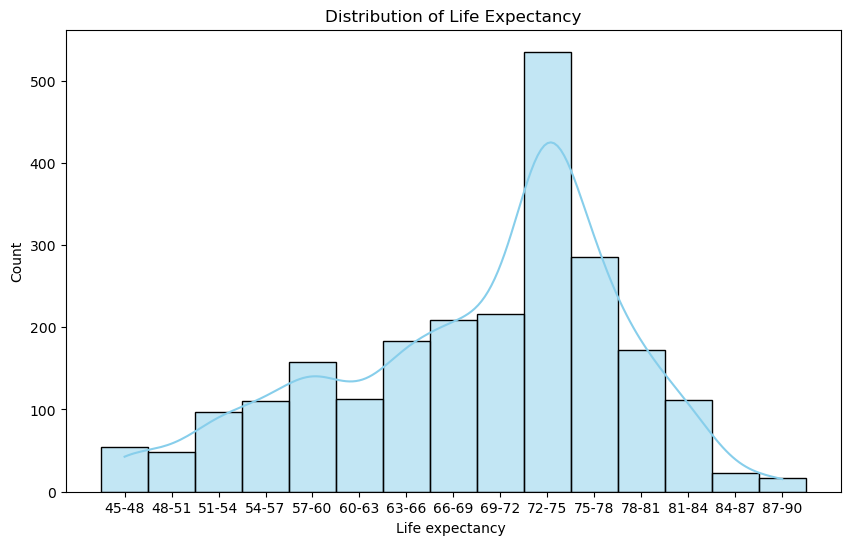

In [54]:
def cut_bins(min=50, max=90, step=5):
    bin_edges = np.arange(min, max + step, step)
    bin_labels = [f'{start}-{end}' for start, end in zip(bin_edges[:-1], bin_edges[1:])]

    return bin_edges, bin_labels

bin_edges, bin_labels = cut_bins(min=45, step=3)

life_exp = pd.cut(df[Description.LIFE_EXPECTANCY.value], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(10, 6))
plt.title('Distribution of Life Expectancy')
sns.histplot(life_exp, bins=bin_labels, kde=True, color='skyblue')

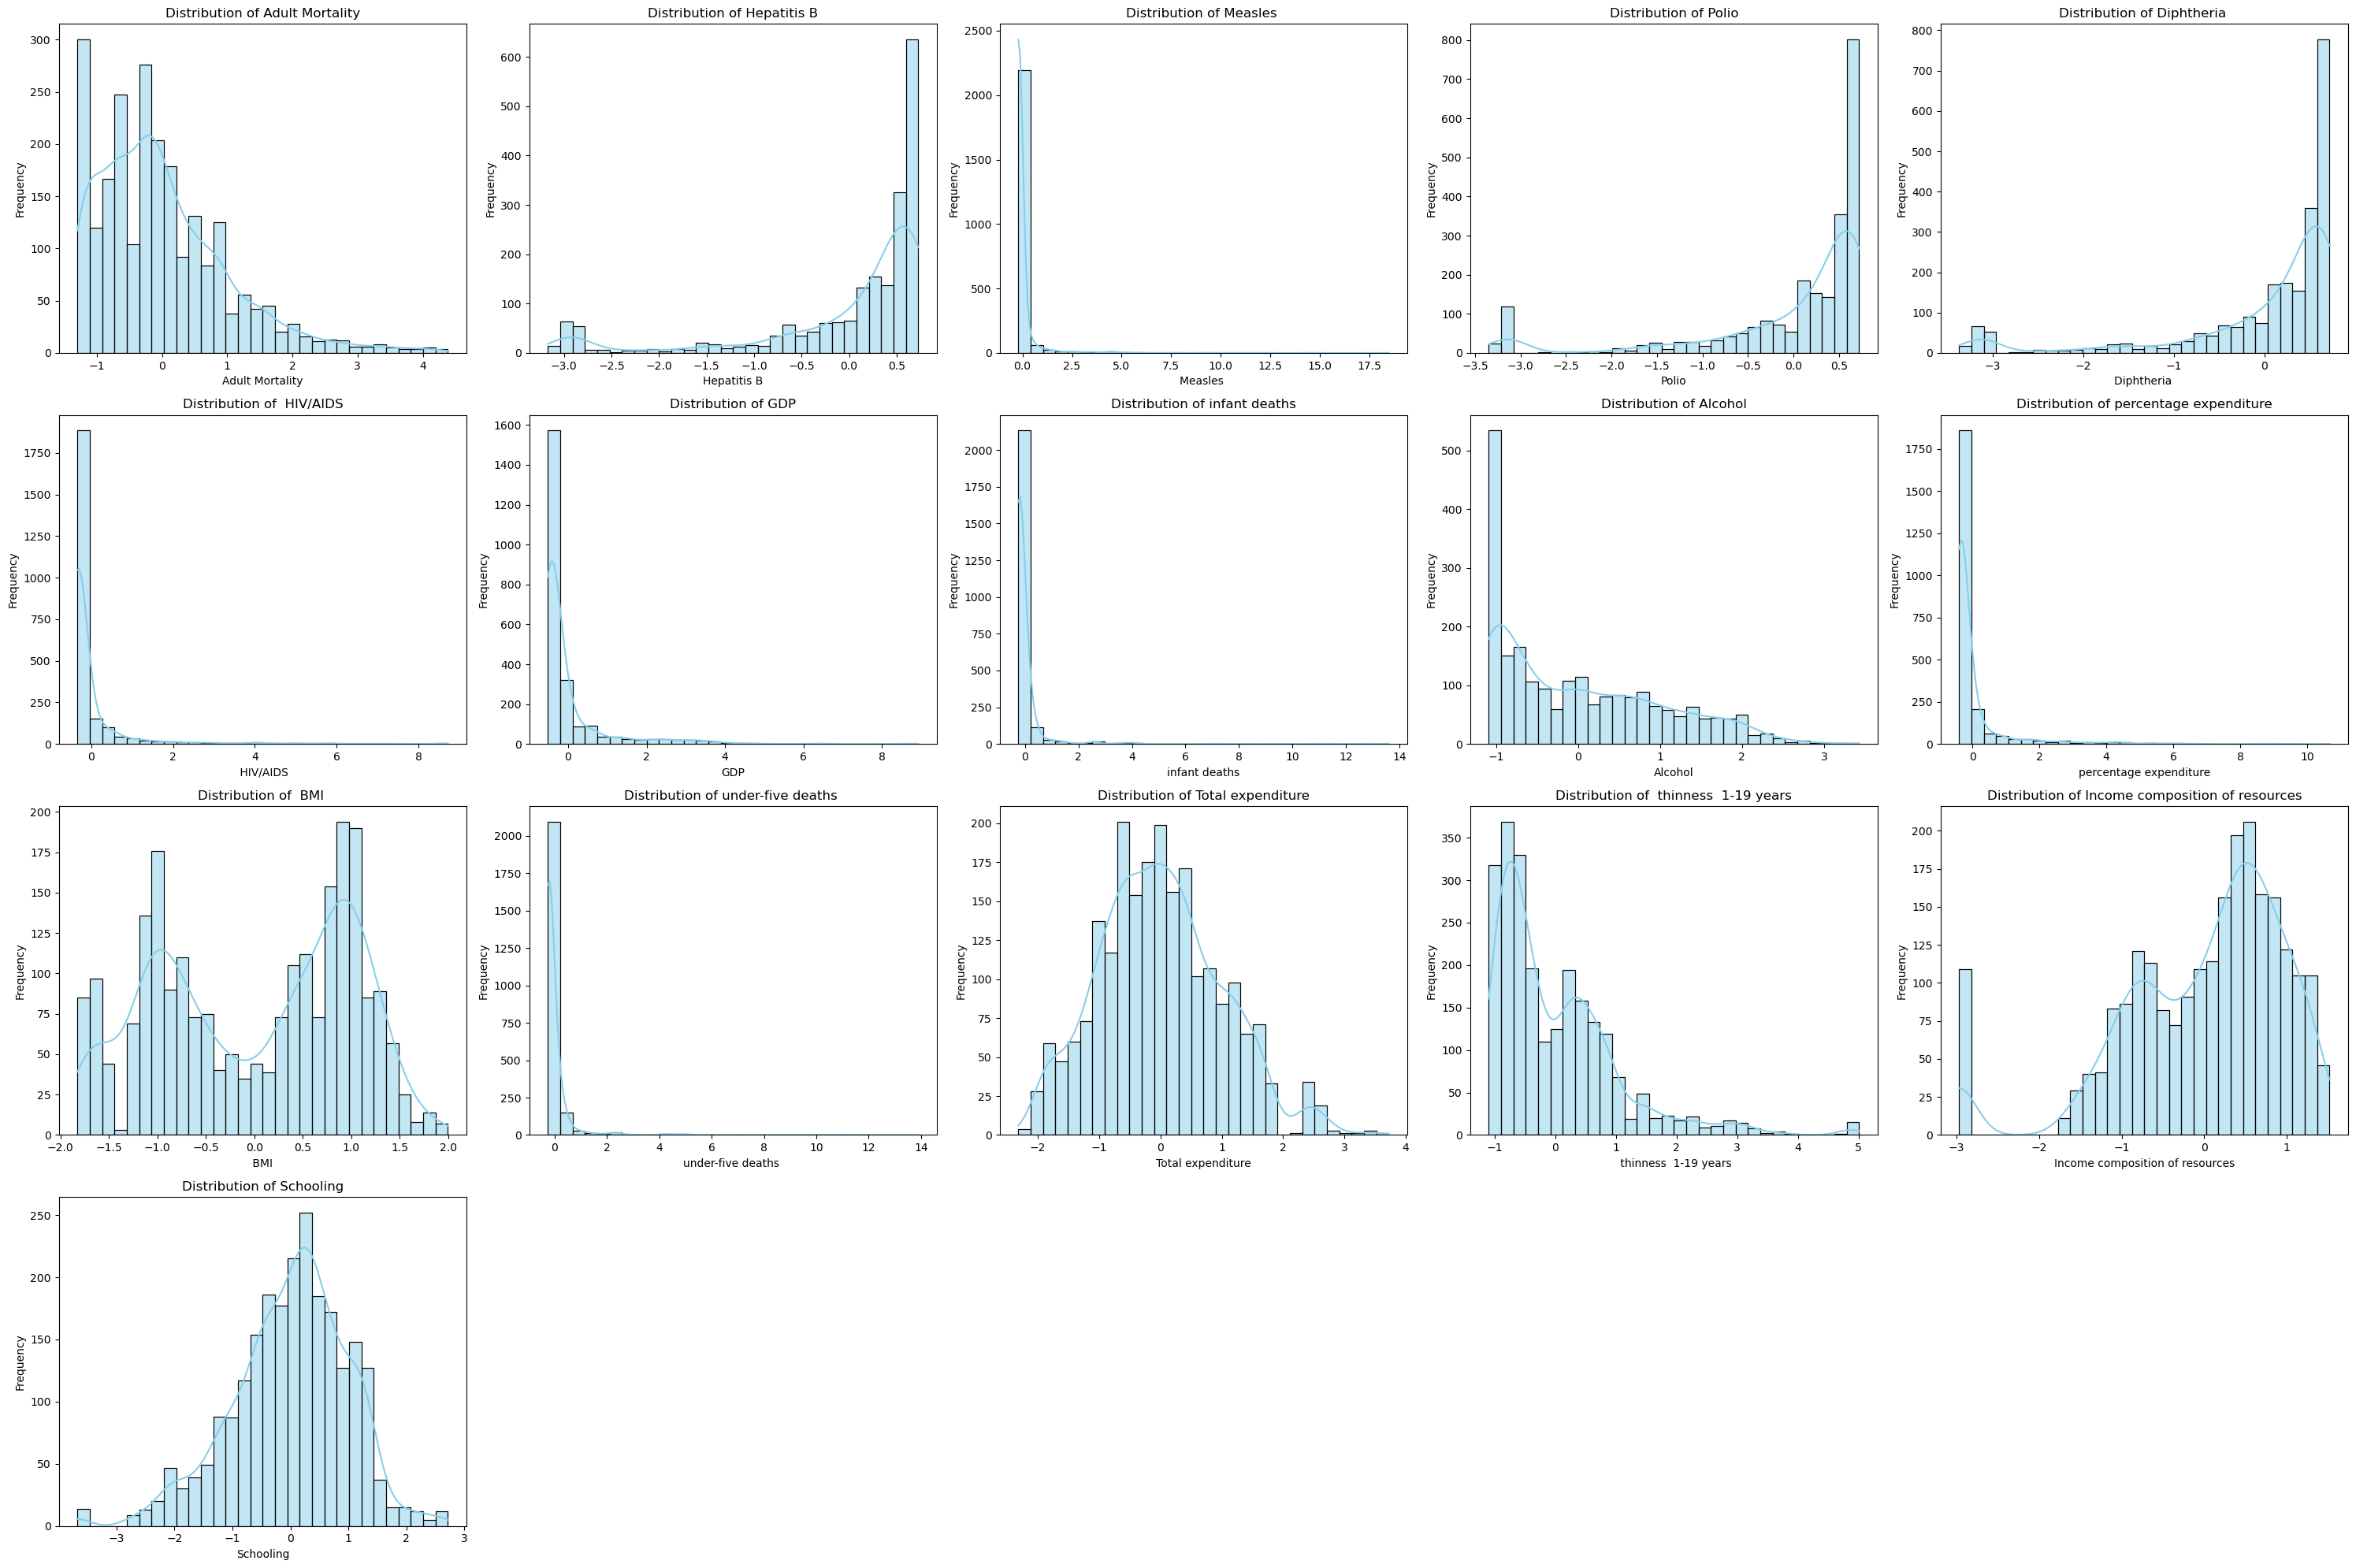

In [55]:
plt.figure(figsize=(30, 20))   

for factor in factors:
    plt.subplot(4, 5, factors.index(factor) + 1)
    sns.histplot(df[factor], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

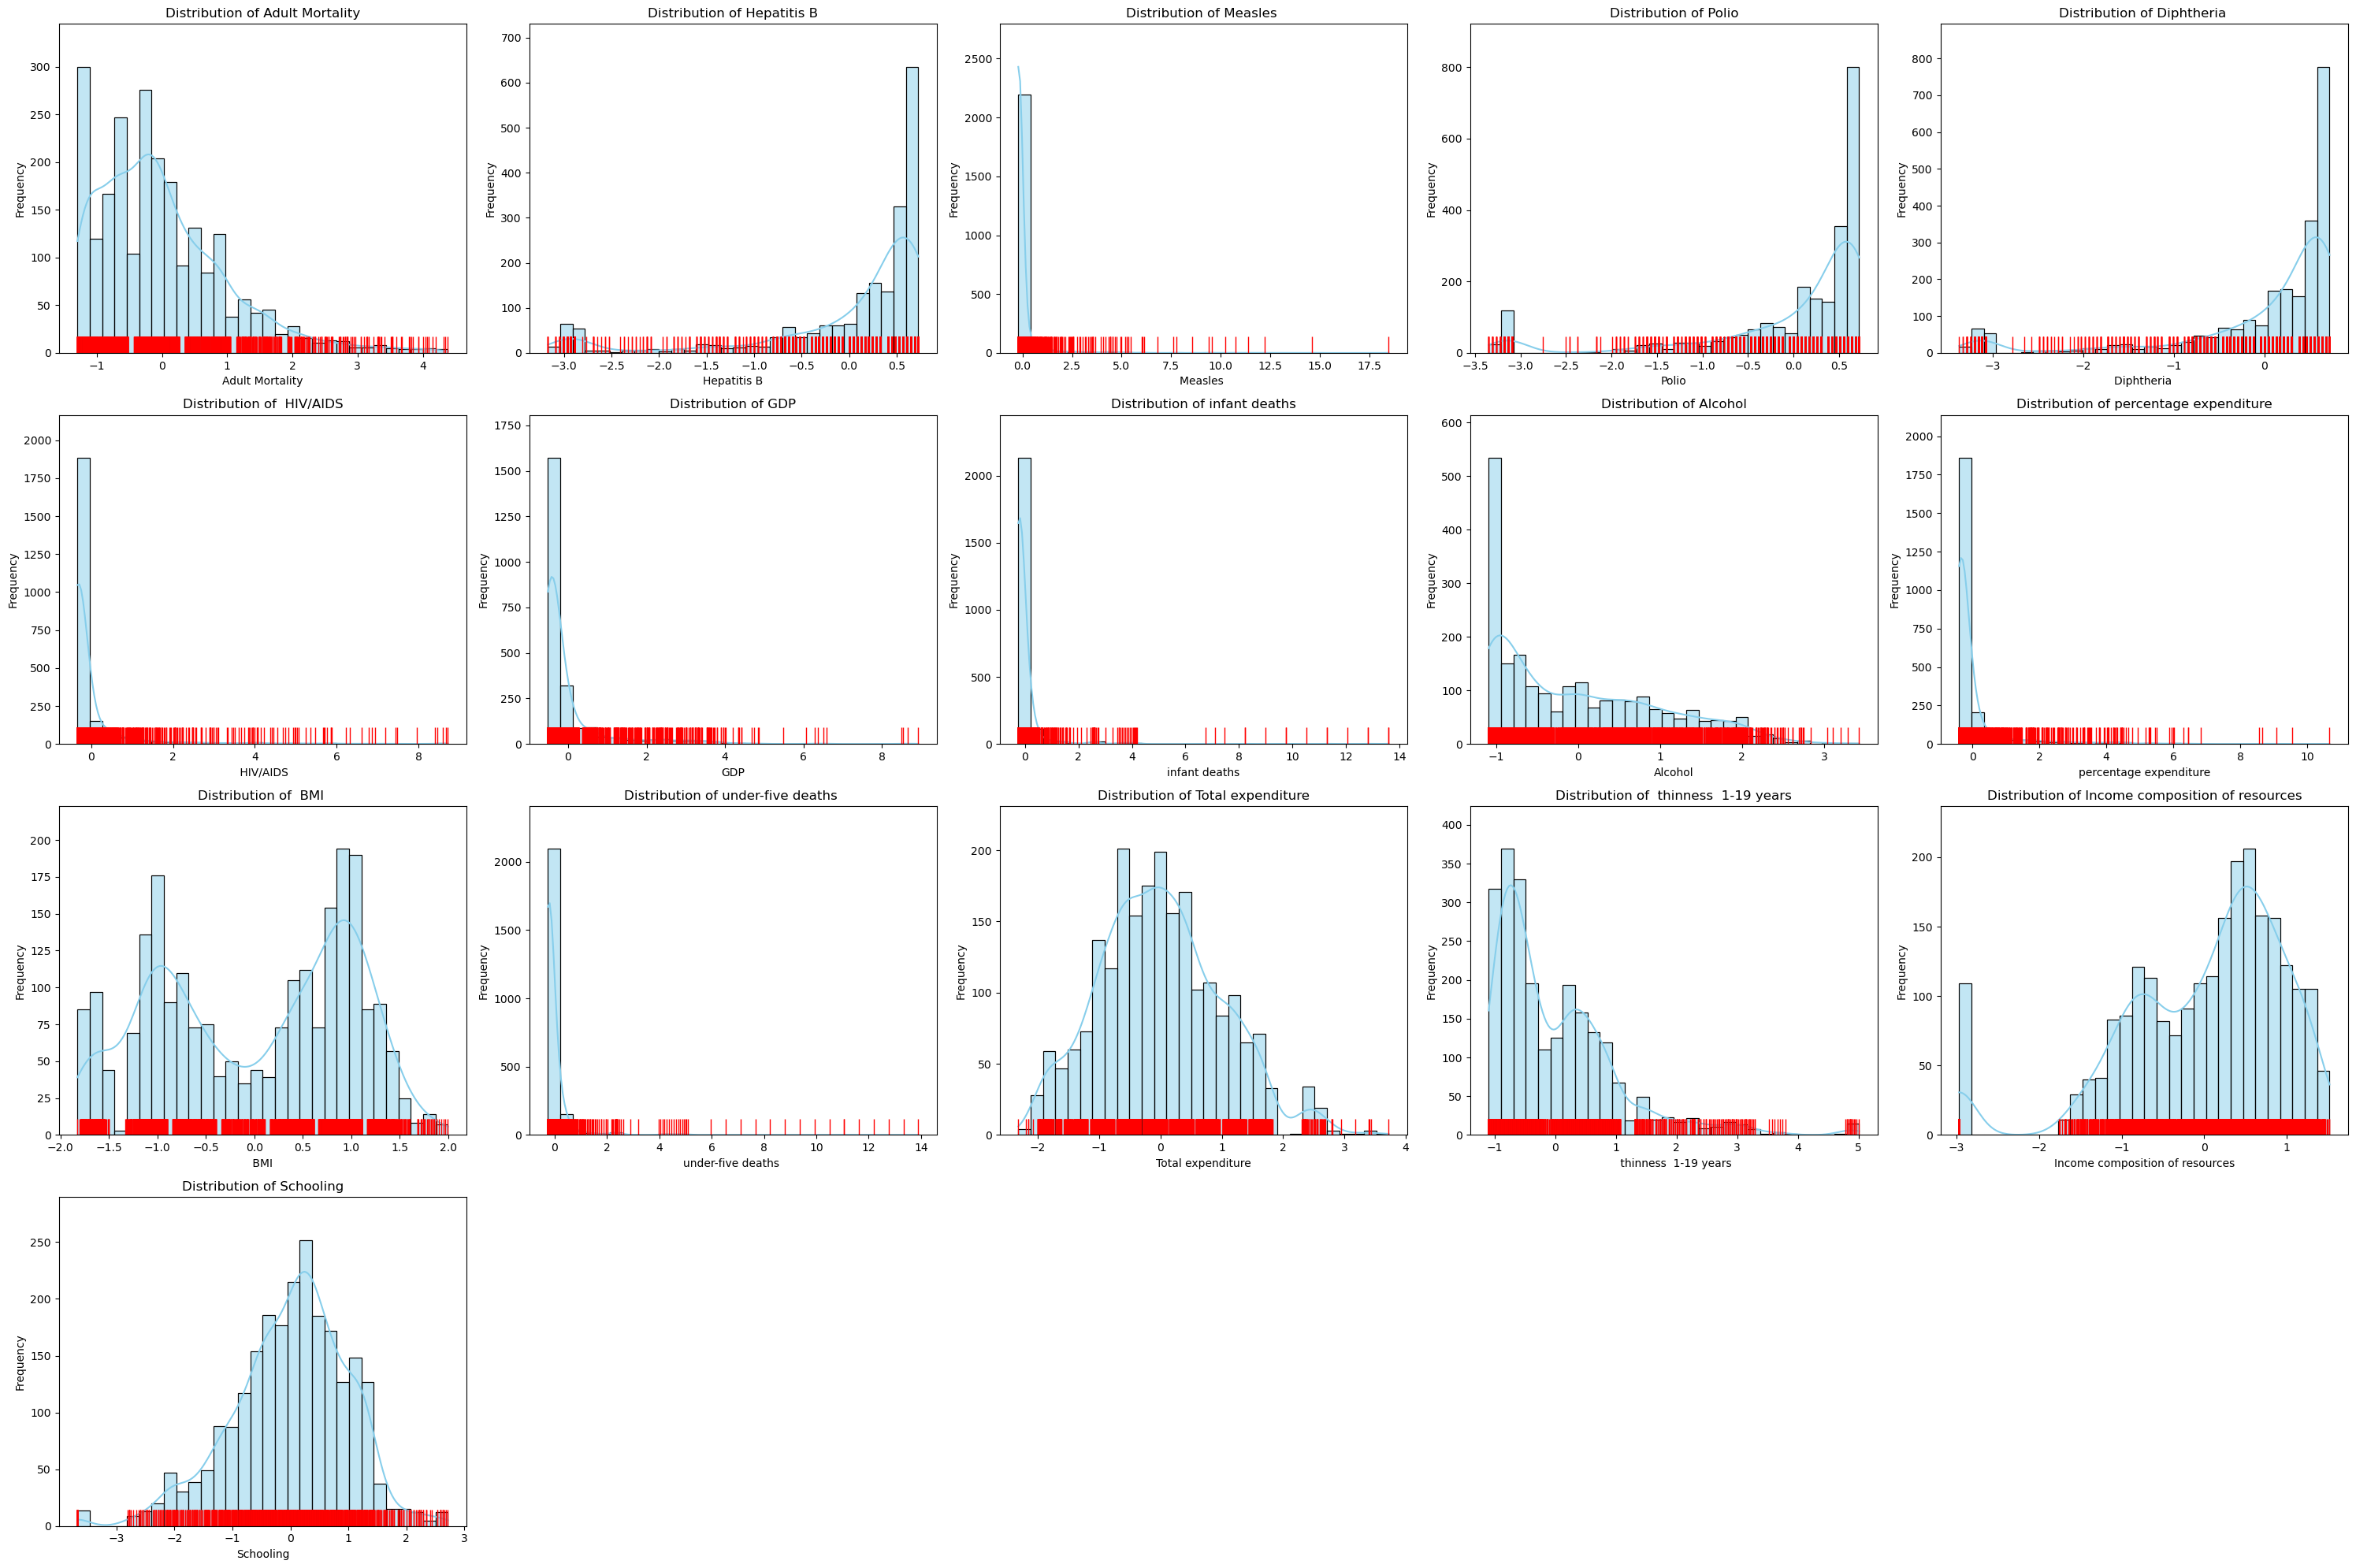

In [56]:
plt.figure(figsize=(30, 20))
for factor in factors:
    plt.subplot(4, 5, factors.index(factor) + 1)
    sns.histplot(df[factor], bins=30, kde=True, color='skyblue')
    sns.rugplot(df[factor], color='red', height=0.05)
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

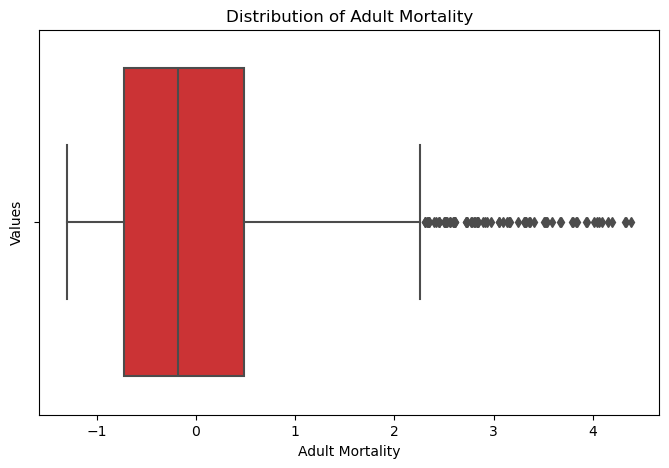

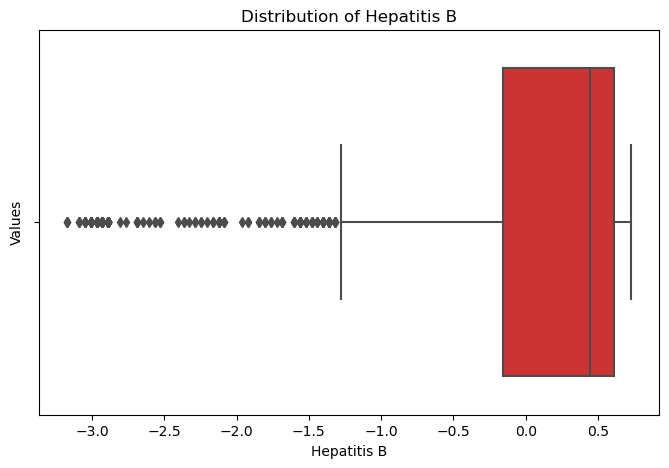

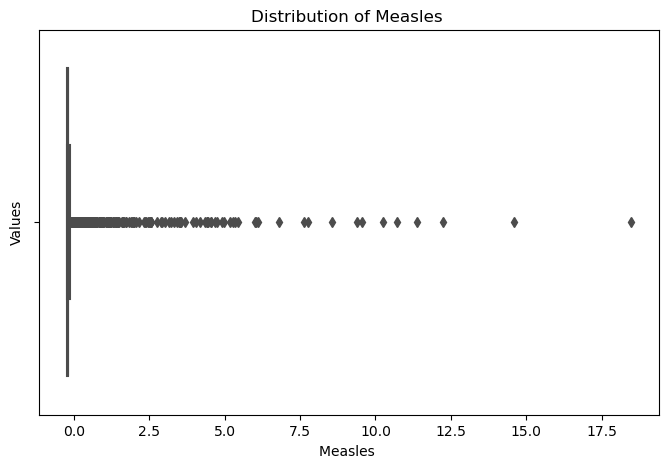

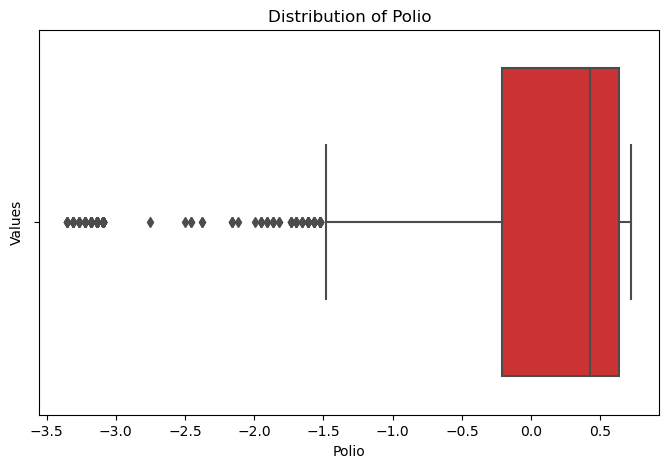

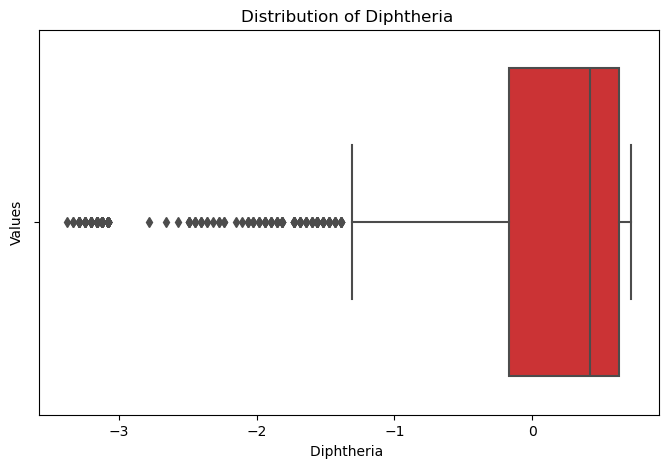

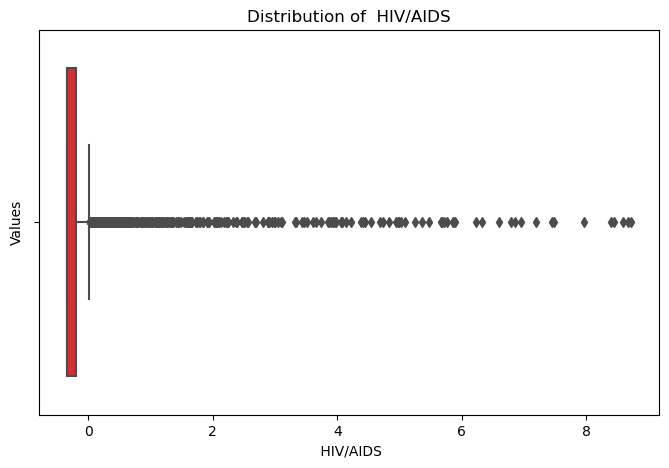

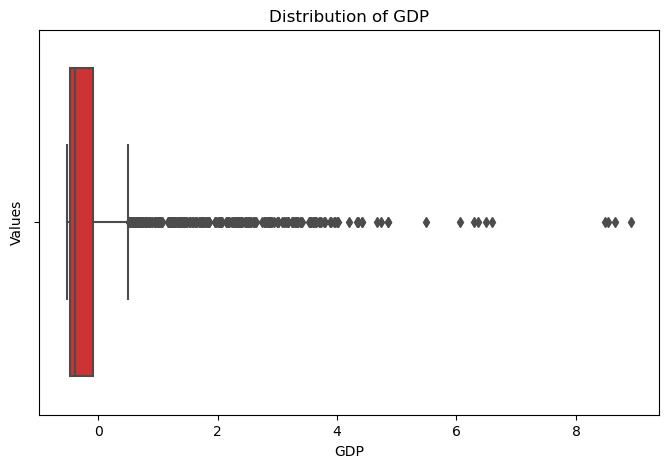

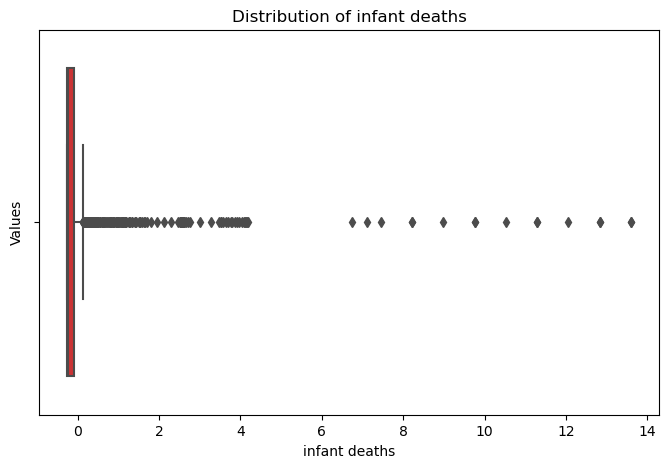

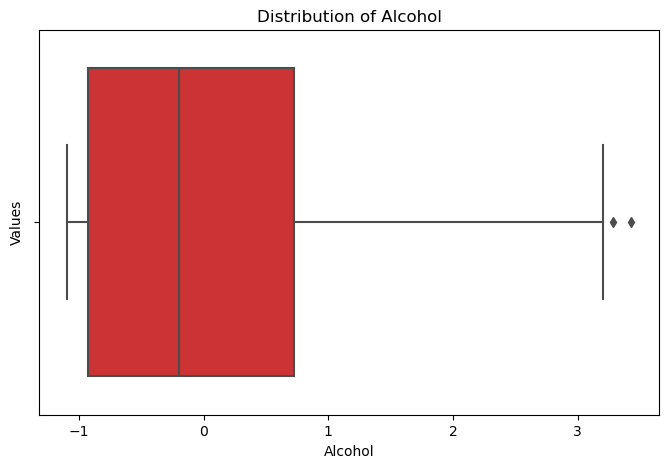

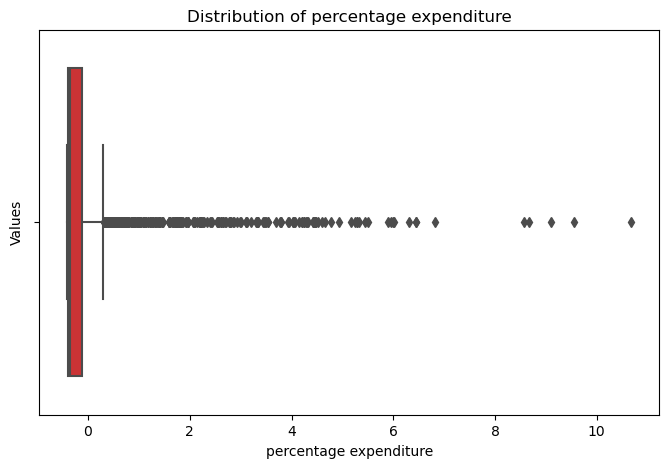

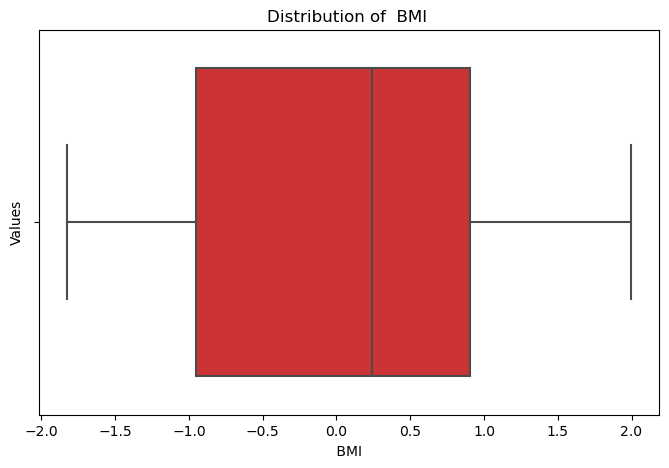

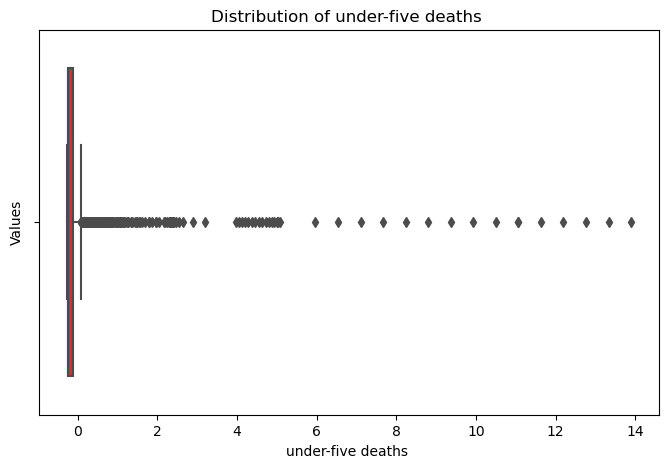

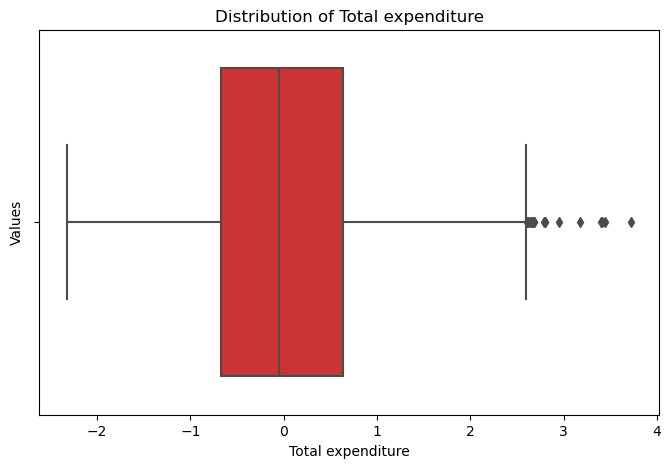

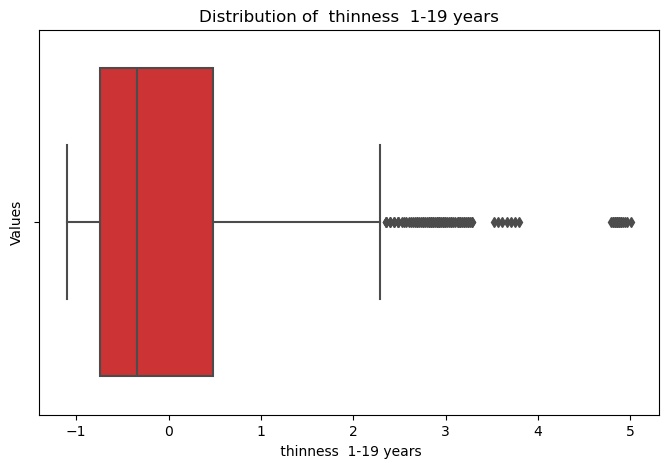

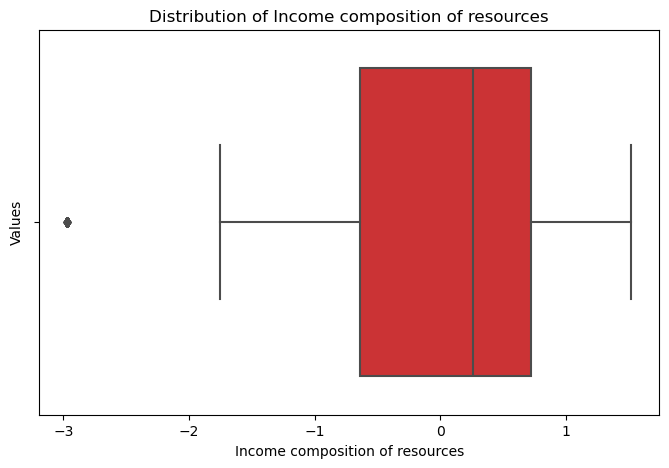

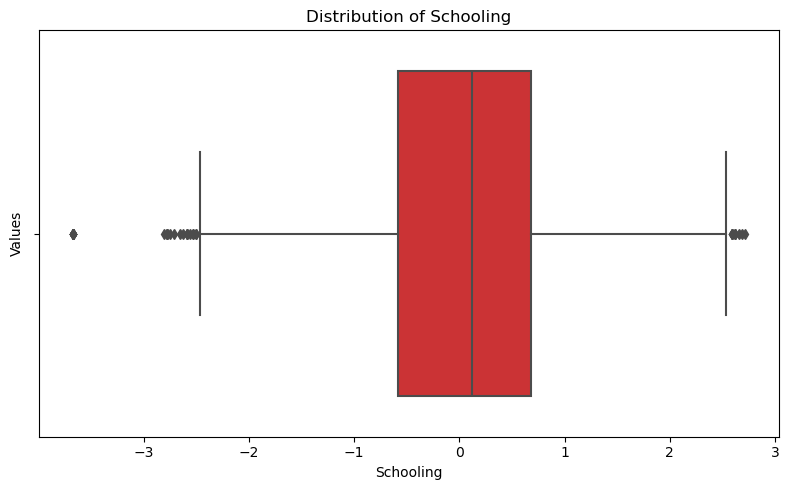

In [57]:
for factor in factors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=factor, data=df, palette='Set1')
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [58]:
cov_matrix = df[factors].cov()
print(cov_matrix)

                                 Adult Mortality  Hepatitis B  Measles   \
Adult Mortality                         1.000425    -0.132342  0.008341   
Hepatitis B                            -0.132342     1.000497 -0.101710   
Measles                                 0.008341    -0.101710  1.000425   
Polio                                  -0.239951     0.447392 -0.120246   
Diphtheria                             -0.233952     0.553697 -0.122960   
 HIV/AIDS                               0.537360    -0.110831  0.027174   
GDP                                    -0.277781     0.083138 -0.080950   
infant deaths                           0.057300    -0.198435  0.522961   
Alcohol                                -0.143776     0.066370 -0.022203   
percentage expenditure                 -0.239076     0.019934 -0.068446   
 BMI                                   -0.378125     0.149505 -0.167228   
under-five deaths                       0.071934    -0.204532  0.530317   
Total expenditure        

In [59]:
factors_with_lx = factors + [Description.LIFE_EXPECTANCY.value]
cor_matrix = df[factors_with_lx].corr()
print(cor_matrix)

                                 Adult Mortality  Hepatitis B  Measles   \
Adult Mortality                         1.000000    -0.139639  0.008338   
Hepatitis B                            -0.139639     1.000000 -0.122335   
Measles                                 0.008338    -0.122335  1.000000   
Polio                                  -0.239529     0.477657 -0.119999   
Diphtheria                             -0.233541     0.613427 -0.122708   
 HIV/AIDS                               0.537131    -0.112141  0.027163   
GDP                                    -0.276930     0.081911 -0.080550   
infant deaths                           0.057275    -0.229266  0.522739   
Alcohol                                -0.141864     0.065519 -0.021900   
percentage expenditure                 -0.238974     0.020052 -0.068417   
 BMI                                   -0.377964     0.149662 -0.167157   
under-five deaths                       0.071903    -0.238798  0.530091   
Total expenditure        

In [60]:
std_deviation = df[factors].std()
print(std_deviation)

Adult Mortality                    1.000213
Hepatitis B                        1.000248
Measles                            1.000213
Polio                              1.000213
Diphtheria                         1.000213
 HIV/AIDS                          1.000213
GDP                                1.000215
infant deaths                      1.000213
Alcohol                            1.000227
percentage expenditure             1.000213
 BMI                               1.000213
under-five deaths                  1.000213
Total expenditure                  1.000227
 thinness  1-19 years              1.000213
Income composition of resources    1.000213
Schooling                          1.000213
dtype: float64


In [61]:
variance = df[factors].var()
print(variance)

Adult Mortality                    1.000425
Hepatitis B                        1.000497
Measles                            1.000425
Polio                              1.000427
Diphtheria                         1.000427
 HIV/AIDS                          1.000425
GDP                                1.000429
infant deaths                      1.000425
Alcohol                            1.000453
percentage expenditure             1.000425
 BMI                               1.000425
under-five deaths                  1.000425
Total expenditure                  1.000454
 thinness  1-19 years              1.000425
Income composition of resources    1.000425
Schooling                          1.000425
dtype: float64


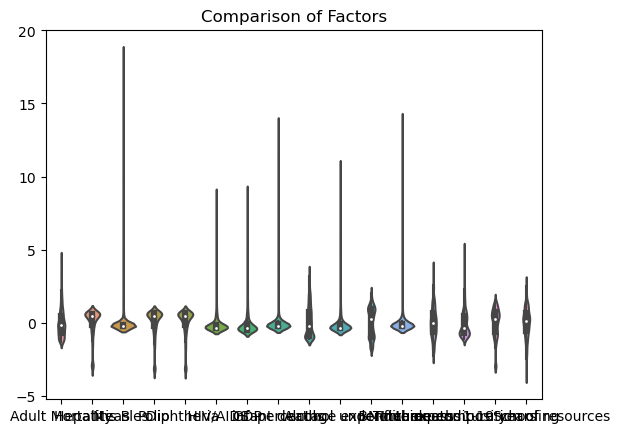

In [62]:
sns.violinplot(data=df[factors])
plt.title('Comparison of Factors')
plt.show()

ValueError: Invalid format specifier

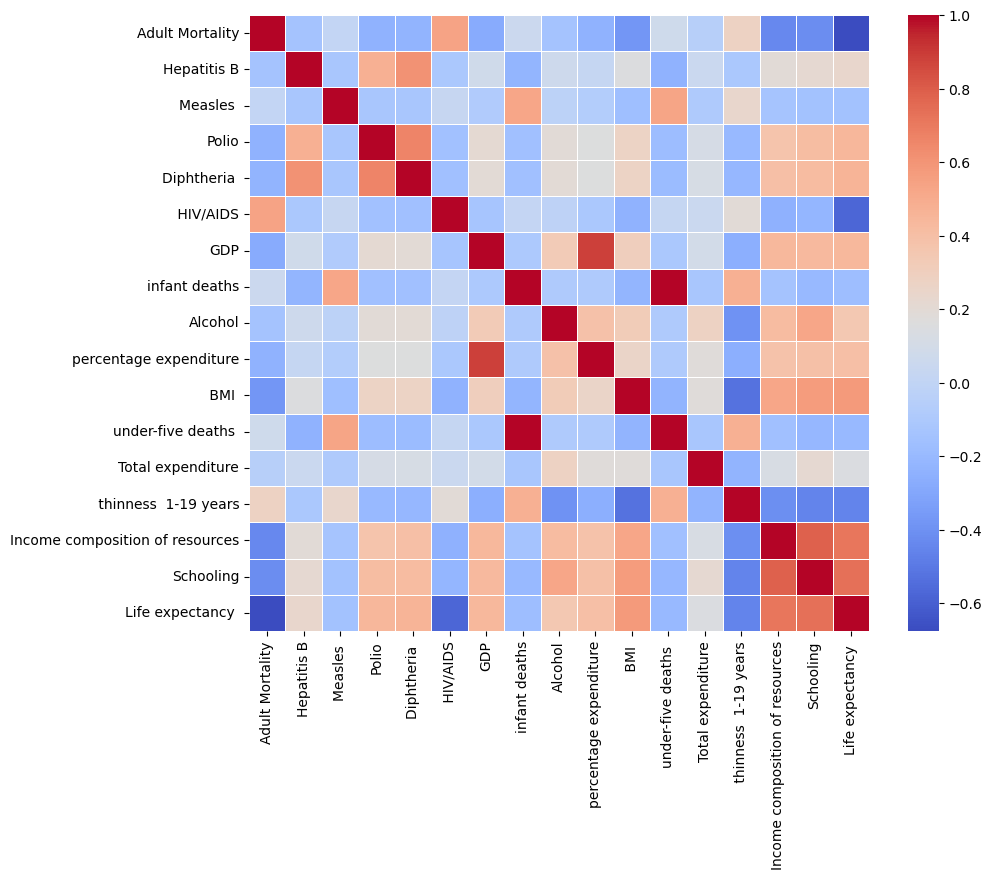

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2ft', linewidth=.5) 
plt.title('Correlation')
plt.show()

Як рівень дитячої та дорослої смертності впливає на рівень життя

In [ ]:
def pearson_factor(factor1, factor2):
    correlation = df[[factor2, factor1]].corr().iloc[0, 1]
    print(f'Correlation between {factor1} and {factor2}: {correlation:.2f}')

pearson_factor(Factors.INFANT_DEATHS.value, Description.LIFE_EXPECTANCY.value)
pearson_factor(Factors.ADULT_MORTALITY.value, Description.LIFE_EXPECTANCY.value)

Correlation between infant deaths and Life expectancy : -0.10
Correlation between Adult Mortality and Life expectancy : -0.66


Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, щоб покращити середню тривалість життя?

In [ ]:
pearson_factor(Factors.PERCENTAGE_EXPENDITURE.value, Description.LIFE_EXPECTANCY.value)

Correlation between percentage expenditure and Life expectancy : 0.44


Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі, способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.

In [ ]:
lifestyle_with_lx = [Factors.BMI.value, Factors.ALCOHOL.value, Factors.THINNESS_1_19_YEARS.value, Description.LIFE_EXPECTANCY.value]
cor_matrix = df[lifestyle_with_lx].corr()
print(cor_matrix)

                           BMI    Alcohol   thinness  1-19 years  \
 BMI                   1.000000  0.379414              -0.495270   
Alcohol                0.379414  1.000000              -0.406870   
 thinness  1-19 years -0.495270 -0.406870               1.000000   
Life expectancy        0.643614  0.303147              -0.365998   

                       Life expectancy   
 BMI                           0.643614  
Alcohol                        0.303147  
 thinness  1-19 years         -0.365998  
Life expectancy                1.000000  


Який вплив навчання в школі на тривалість життя людини?

In [ ]:
pearson_factor(Factors.SCHOOLING.value, Description.LIFE_EXPECTANCY.value)

Correlation between Schooling and Life expectancy : 0.75


Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?

In [ ]:
pearson_factor(Factors.ALCOHOL.value, Description.LIFE_EXPECTANCY.value)

Correlation between Alcohol and Life expectancy : 0.30


Який вплив охоплення імунізацією на очікувану тривалість життя?

In [ ]:
pearson_factor(Factors.HIV_AIDS.value, Description.LIFE_EXPECTANCY.value)

Correlation between  HIV/AIDS and Life expectancy : -0.57
